# HIV Model

Jocelyn Jimenez 

In [69]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [70]:
init = State(r=200, l=0, e=0, v=100)

,values
r,200
l,0
e,0
v,100


In [71]:
system = System(tau = 0.2,
                gamma = 1.36,
                mu = 0.00136,
                beta = 0.00027,
                alpha = 0.036,
                delta = 0.33,
                pi = 100,
                sigma = 2,
               rho = 0.1,
               dt = .5,
               t0 = 0)

,values
tau,0.20000
gamma,1.36000
mu,0.00136
beta,0.00027
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000
rho,0.10000
dt,0.50000


In [72]:
def update_func(init, system, t):
    
    r, l, e, v = init
    unpack(system)
    
    dr = (gamma * tau) - (mu * r) -(beta * r *v) 
    dl = (rho * beta * r * v) - (mu * l)- (alpha * l)
    de = ((1-rho) * beta * r * v) + (alpha * l) - (delta * e)
    dv = (pi * e) - (sigma * v)
    
    r += dr*dt
    l += dl*dt
    e += de*dt
    v += dv*dt
    
    return State(r=r, l=l, e=e, v=v)

In [73]:
def run_simulation(update_func, system):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, 120, dt):
        frame.row[t+dt] = update_func(frame.row[t], system, t)
    
    
    return frame

In [74]:
data = run_simulation(update_func, system)
print()

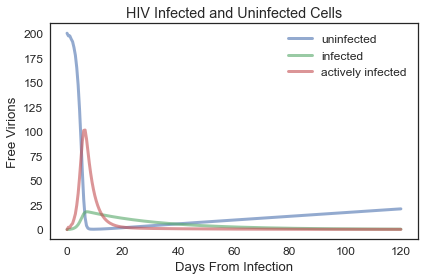

In [79]:
plot(data.r, label='uninfected')
plot(data.l, label='infected')
plot(data.e, label='actively infected')
# plot(data.v)

decorate(title='HIV Infected and Uninfected Cells',
         xlabel='Days From Infection',
         ylabel='Free Virions',
         loc='upper right')